## Data Cleaning and Exploration

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('../data/dataset.csv')
df = df.drop(columns=['Unnamed: 0', 'track_genre', 'explicit'])
df.shape

(114000, 18)

In [6]:
nan = df.isnull().any(axis=1) #1
df[nan]
df.drop(df[nan].index, inplace=True)  # drop because duration is 0, no sense
df.shape

(113999, 18)

In [8]:
df.duplicated().sum()
df[df.duplicated(keep=False)]
df1 = df.drop_duplicates()
df1.shape

(90460, 18)

In [13]:
exclude = ['track_id', 'album_name', 'popularity']
subset_cols = [col for col in df1.columns if col not in exclude]
delme = df1[df1.duplicated(subset=subset_cols, keep=False)]
df2 = df1.drop(delme.index)
df2.shape


(80580, 18)

In this first phase, one missing song that is zero seconds long and many duplicates are removed. Before this, it was necessary to remove the genre column, because many duplicated songs were registered with a different genre, and could not be caught.  
Also, there were many duplicated songs registered in different albums, and for this reason with a different track_id and popularity.

In [15]:
num = df2.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'key', 'mode', 'time_signature'])
num.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,80580.000000,8.058000e+04,80580.000000,80580.000000,80580.000000,80580.000000,80580.000000,80580.000000,80580.000000,80580.000000,80580.000000
mean,35.261616,2.318609e+05,0.558597,0.634939,-8.608824,0.089043,0.330987,0.185017,0.219957,0.463645,122.147957
std,19.067316,1.168532e+05,0.177379,0.258833,5.300662,0.116904,0.340493,0.331711,0.198308,0.263509,30.064205
min,0.000000,8.586000e+03,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.740000e+05,0.446000,0.454000,-10.484000,0.036000,0.015800,0.000000,0.098600,0.242000,99.576500
50%,35.000000,2.157745e+05,0.572000,0.678000,-7.285000,0.049100,0.193000,0.000091,0.133000,0.449000,122.024500
75%,49.000000,2.677948e+05,0.689000,0.857000,-5.148000,0.087000,0.633000,0.154000,0.283000,0.676000,140.125000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


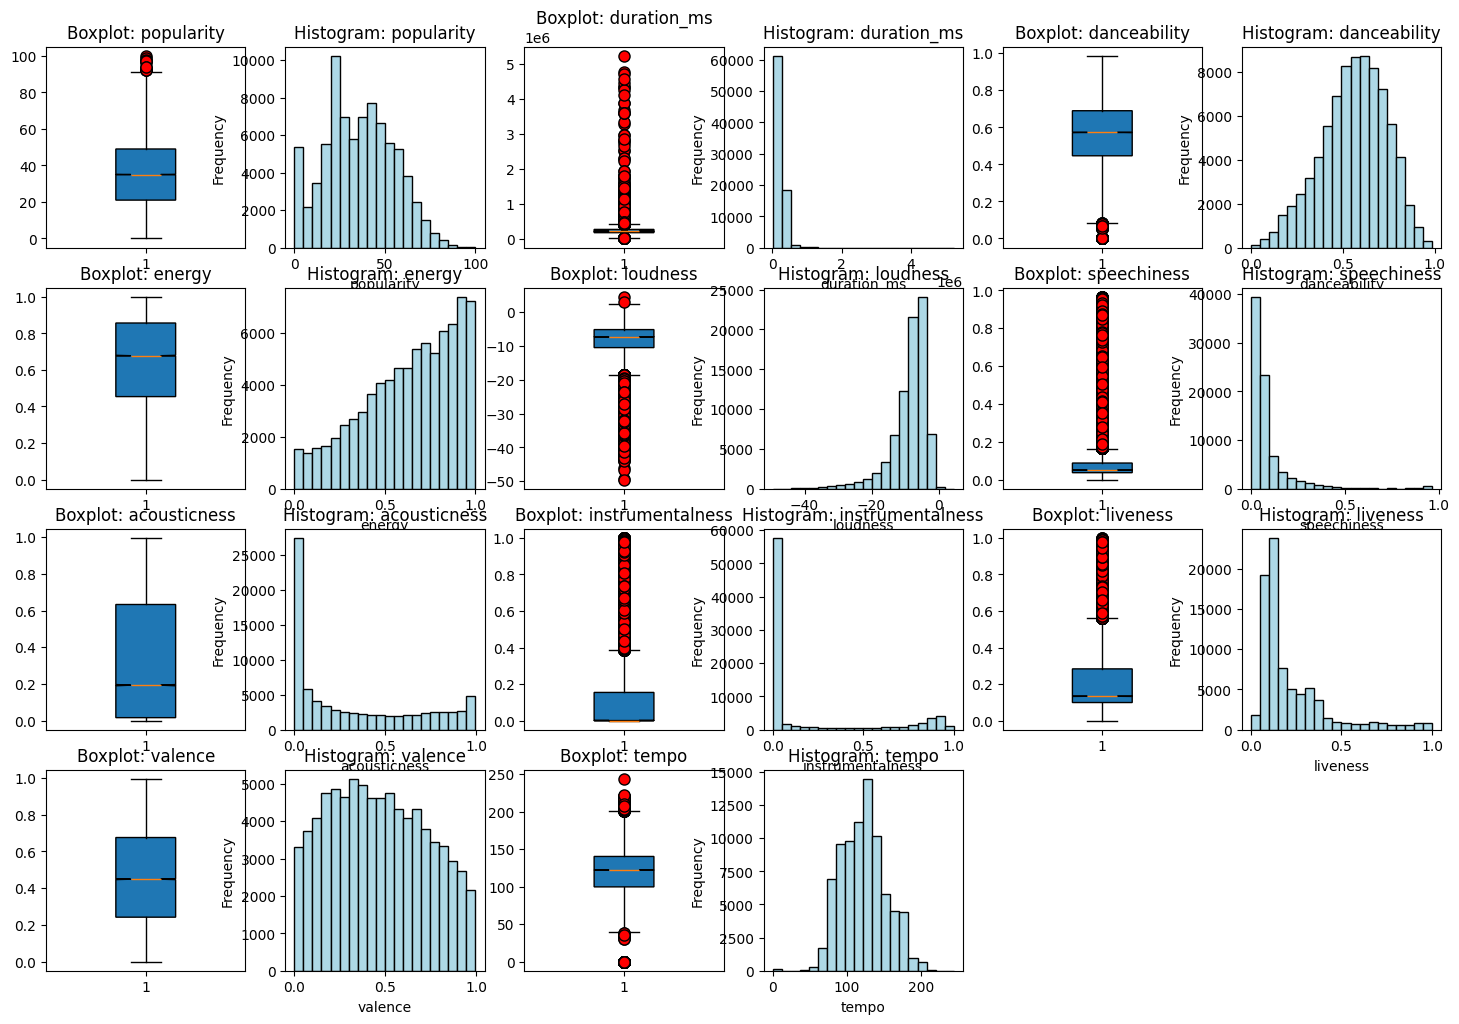

In [16]:
cols = num.columns
n = len(cols)
n_plots = n * 2    # 2 plots each variable
ncols = 6          # 6 plots each row
nrows = math.ceil(n_plots / ncols) 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3))
axes = axes.flatten()  # necessary to iterate axes[i]

for i, col in enumerate(cols):
    axes[i * 2].boxplot(num[col], notch=True, patch_artist=True,
                        flierprops=dict(marker='o', markersize=8, markerfacecolor='red'),
                        widths=0.3)
    axes[i * 2].set_title(f'Boxplot: {col}')

    axes[i * 2 + 1].hist(num[col], bins=20, color='lightblue', edgecolor='black')
    axes[i * 2 + 1].set_title(f'Histogram: {col}')
    axes[i * 2 + 1].set_xlabel(col)
    axes[i * 2 + 1].set_ylabel('Frequency')

# delete remaining axes
for j in range(n * 2, len(axes)):
    fig.delaxes(axes[j])

### Column Description  
**popularity:** value between 0 and 100 (100 most popular). It is based on the total number of plays the track has had and how recent those plays are. Artist and album popularity is derived mathematically from track popularity.    
**danceability:** how suitable a track is for dancing based on musical elements including tempo, rhythm stability, beat strength, and overall regularity. 1.0 is most danceable  
**energy:** from 0.0 to 1.0 and represents a measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.  
**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1  
**loudness:** The overall loudness of a track in decibels (dB)  
**mode:** Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0  
**speechiness:** presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks  
**acousticness:** measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic  
**instrumentalness:** whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content  
**liveness:** presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.  
**valence:** A measure from 0.0 to 1.0 describing the musical positiveness. Tracks with high valence sound more positive, while tracks with low valence sound more negative  
**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration  
**time_signature:** notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.  
  
Only numeric variables will be maintained for clustering, together with id, title and artists for identificability.

In [17]:
X = df2.drop(columns=['key', 'mode', 'time_signature'])
X.to_csv('../data/cleaned_data.csv', index=False)